

# Project: Investigate a Dataset  [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

### Dataset Description 

>his data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.




### Question(s) for Analysis
###### 1. which genres are most produced over years?
###### 2. what is the relation between movie duration and rate?
###### 3. which year has the bigest number of movies?
###### 4. what is the madian budgat for movies?
###### 5.is people prefer old movies?
###### 6.What is the most used keywords of the TMDb data set?


In [50]:
#  import statements for all of used packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from datetime import datetime
from wordcloud import WordCloud

<a id='wrangling'></a>
## Data Wrangling

In [51]:
 #Load your data and print out a few lines.
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [52]:
# display  dataframe summary for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning


#### 1. clean unwanted items

In [53]:
removed_data = ['id', 'imdb_id', 'homepage','tagline', 'overview']

df.drop(removed_data, axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### 2.solve duplication problem  

In [54]:
#check duplication 
df.duplicated().sum()

1

In [55]:
#remove duplicated items
df.drop_duplicates(inplace=True)
#check duplication
df.duplicated().sum()

0

#### 3. solve data type problem

In [56]:
# convert release_date column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

#### 4. remove non rows

In [57]:
df = df.replace(0, np.nan)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 10848
Data columns (total 16 columns):
popularity              3677 non-null float64
budget                  3677 non-null float64
revenue                 3677 non-null float64
original_title          3677 non-null object
cast                    3677 non-null object
director                3677 non-null object
keywords                3677 non-null object
runtime                 3677 non-null float64
genres                  3677 non-null object
production_companies    3677 non-null object
release_date            3677 non-null datetime64[ns]
vote_count              3677 non-null int64
vote_average            3677 non-null float64
release_year            3677 non-null int64
budget_adj              3677 non-null float64
revenue_adj             3677 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(6)
memory usage: 488.4+ KB


<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (Which genres are most produced over years?)

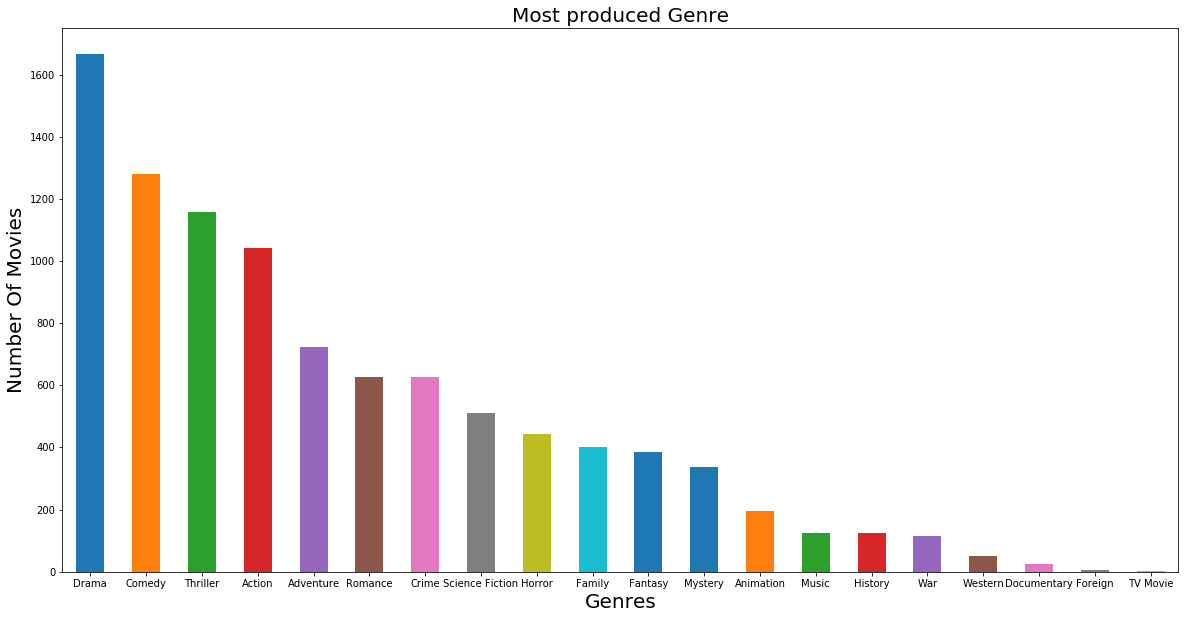

In [58]:
# function generate dummy matrix
def dum (column1):
    return column1.str.get_dummies(sep='|')

genres_dum = dum(df['genres'])
# Bar Chart 
genres_dum.sum().sort_values(ascending=False).plot.bar(figsize = (20,10))
plt.title('Most produced Genre', fontsize =20)
plt.xlabel('Genres', fontsize = 20)
plt.ylabel('Number Of Movies', fontsize = 20)
plt.xticks(rotation =0);


the most produced genres is drama

### Research Question 2  (what is the relation between movie duration and rate?)

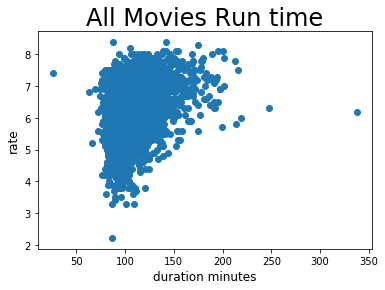

In [60]:
# using scatter plot to describe the relation between duration and rate 
plt.scatter(df['runtime'], df['vote_average'])
plt.title('All Movies Run time', fontsize = 24)
plt.xlabel('duration minutes', fontsize = 12)
plt.ylabel('rate', fontsize = 12);

long movies have high rate

### Research Question 3  ( which year has the bigest number of movies?)

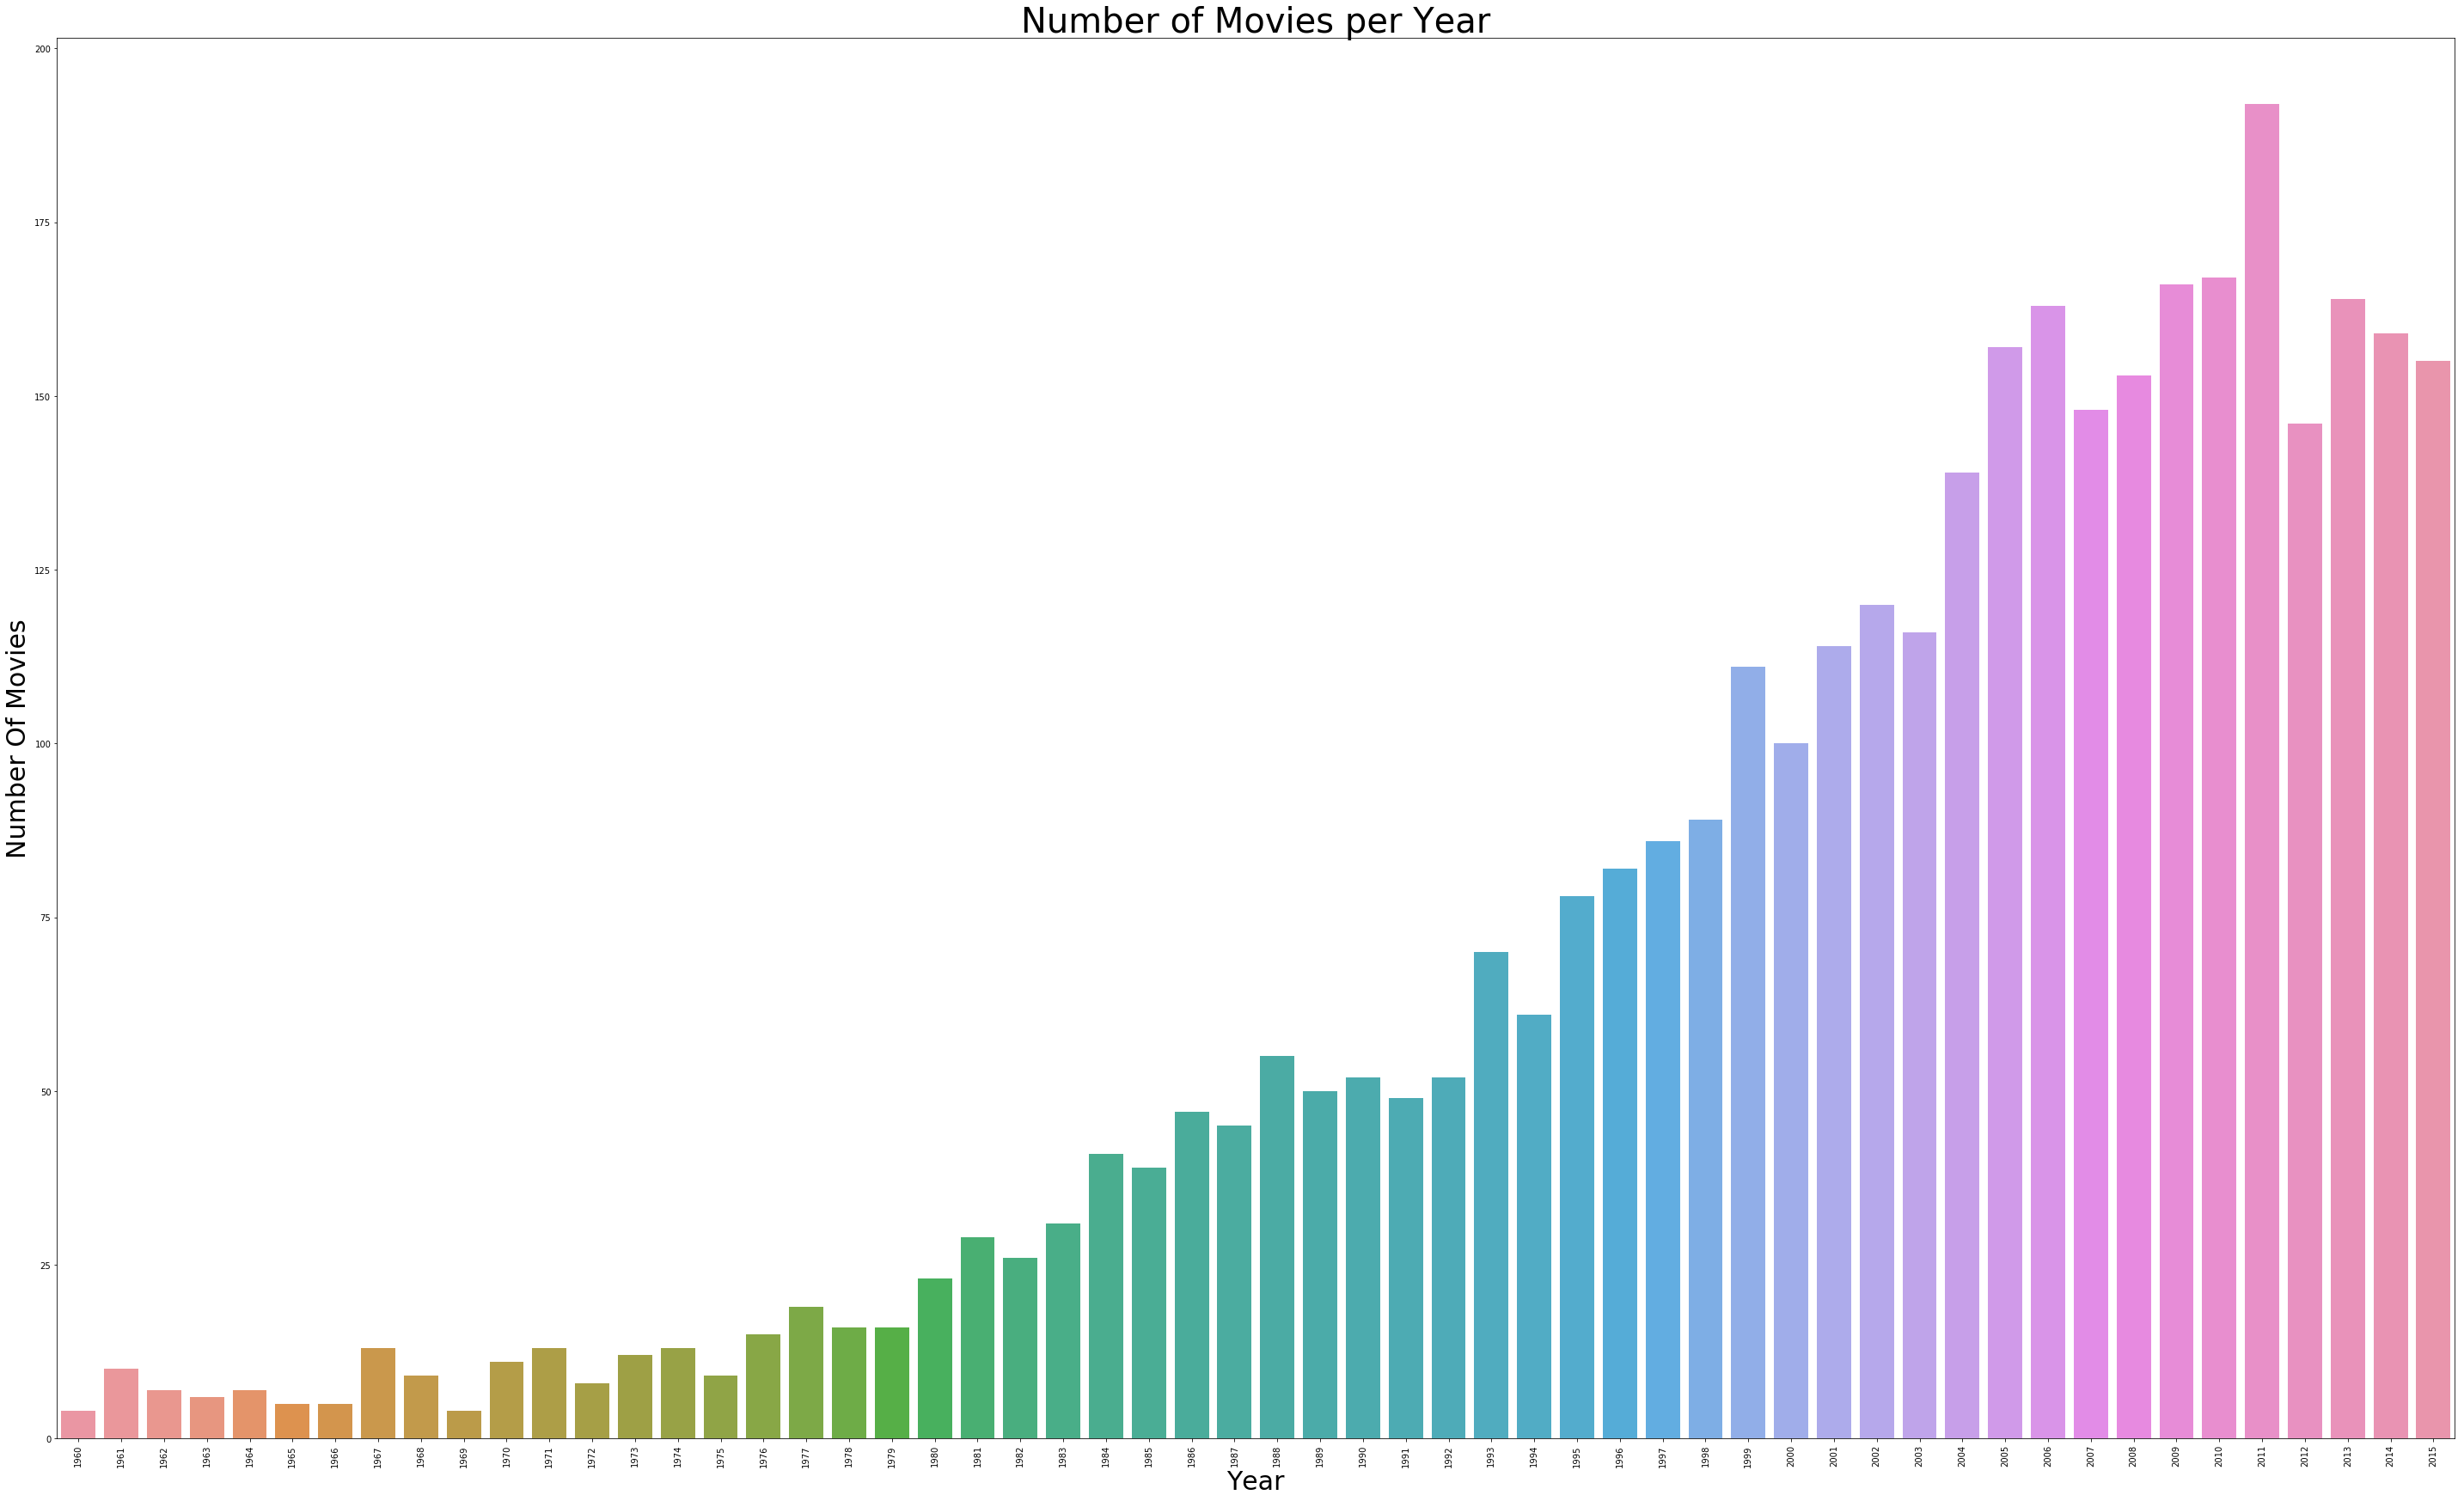

In [61]:
plt.figure(figsize=(50,30))
sns.countplot(df['release_year'])
plt.title('Number of Movies per Year', fontsize = 40)
plt.xlabel('Year', fontsize = 30)
plt.ylabel('Number Of Movies', fontsize = 30)
plt.xticks(rotation = 90);

 year 2011 has the maximum number of movies

### Research Question 4  ( what is the madian budgat for movies?)

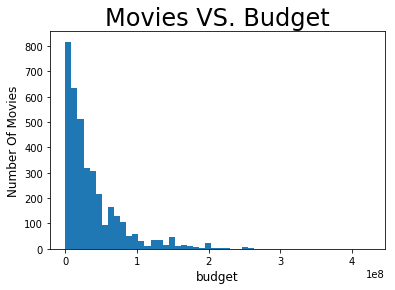

In [62]:
plt.hist(df['budget'] , bins=50)
plt.title('Movies VS. Budget', fontsize = 24)
plt.xlabel('budget', fontsize = 12)
plt.ylabel('Number Of Movies', fontsize = 12);

madian of budget is10e8

### Research Question 5 (is people prefer old movies ?)

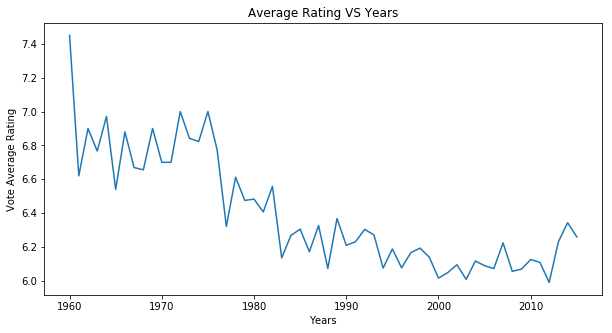

In [63]:
avg= df.groupby("release_year")["vote_average"].mean()
avg.plot(kind='line',title='Average Rating VS Years',figsize = (10,5))
plt.xlabel('Years')
plt.ylabel('Vote Average Rating');

the rate of old movies is higher

### Research Question 6 (What is the most used keywords of the TMDb data set?)

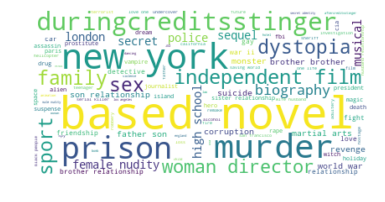

In [64]:
text = ','.join(df['keywords'].str.cat(sep='|').split('|'))

wordcloud = WordCloud(max_words=100, background_color = 'white').generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

<a id='conclusions'></a>
## Conclusions
1. the most produced genres is drama
2. long movies have high rate
3. year 2011 has the maximum number of movies
4. madian of budget is10e8
5. the rate of old movies is higher

## The limitations 
• NAN values
• zeros values
• Duplicates 
• Inccorect datatype

## Submitting your Project 

In [65]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0